In [47]:
import pandas as pd

# Load the dataset
file_path = 'diabetes_data.csv'
data = pd.read_csv(file_path)

# Inspect the dataset to get a sense of its structure
data.head(), data.info(), data.describe(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      79954 non-null  object 
 1   age                         80145 non-null  float64
 2   hypertension                80169 non-null  float64
 3   diabetes_pedigree_function  80120 non-null  float64
 4   diet_type                   79939 non-null  object 
 5   star_sign                   79806 non-null  object 
 6   BMI                         79934 non-null  float64
 7   weight                      80126 non-null  float64
 8   family_diabetes_history     79863 non-null  float64
 9   social_media_usage          79968 non-null  object 
 10  physical_activity_level     80032 non-null  object 
 11  sleep_duration              80063 non-null  float64
 12  stress_level                80024 non-null  object 
 13  pregnancies                 80

(   gender   age  hypertension  diabetes_pedigree_function    diet_type  \
 0  female   NaN           NaN                        0.37        paleo   
 1    male  59.0           0.0                        0.73          NaN   
 2  female  31.0           NaN                         NaN          NaN   
 3  female  81.0           1.0                        0.37  pescatarian   
 4     NaN  64.0           0.0                        0.55    carnivore   
 
   star_sign   BMI  weight  family_diabetes_history social_media_usage  \
 0       NaN   NaN   197.7                      NaN       Occasionally   
 1       Leo  17.1   156.5                      0.0       Occasionally   
 2       NaN  22.5   137.8                      NaN       Occasionally   
 3       NaN   NaN   108.2                      0.0                NaN   
 4       NaN   NaN   179.7                      NaN       Occasionally   
 
   physical_activity_level  sleep_duration stress_level  pregnancies  \
 0               Sedentary    

In [48]:
# Calculate missing values and their percentages
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a summary DataFrame for missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)


missing_summary

,Missing Values,Percentage (%)
star_sign,20194,20.194
family_diabetes_history,20137,20.137
alcohol_consumption,20104,20.104
BMI,20066,20.066
diet_type,20061,20.061
gender,20046,20.046
social_media_usage,20032,20.032
stress_level,19976,19.976
physical_activity_level,19968,19.968
pregnancies,19967,19.967


In [ ]:
# Define the numerical and categorical columns in the dataset
numerical_columns = ['age', 'BMI', 'diabetes_pedigree_function', 'weight', 'sleep_duration', 'pregnancies']
categorical_columns = ['gender', 'diet_type', 'social_media_usage', 'stress_level', 'physical_activity_level', 'alcohol_consumption','hypertension','family_diabetes_history' ]
target_column = 'diabetes'

# Impute missing values based on column types and importance

# 1. Drop columns with high missing percentages or less importance
columns_to_drop = ['star_sign']  # Subject to review based on importance
data_cleaned = data.drop(columns=columns_to_drop)

# 2. Impute numerical columns with mean
for col in numerical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())

# 3. Impute categorical columns with mode 
#for col in categorical_columns:
#   data_cleaned[col] =  data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Impute missing values in categorical columns with "Unknown"
for col in categorical_columns:
    data_cleaned[col] =  data_cleaned[col].fillna("Unknown")

# 4. Drop rows with missing values in the target column (diabetes)
data_cleaned = data_cleaned[data_cleaned['diabetes'].notna()]

# Confirm changes
missing_cleaned_summary = data_cleaned.isnull().sum()
missing_cleaned_summary

# Shape of cleaned data and total missing values count
data_cleaned.shape, missing_cleaned_summary.sum()  

#file can be used here as well
#data_cleaned.to_csv('cleaned_diabetes_data.csv')

In [50]:

# Detect and remove outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Outlier analysis and removal for significant numerical variables
numerical_vars = ['age', 'BMI', 'diabetes_pedigree_function', 'weight', 'sleep_duration']
#numerical_vars = numerical_columns
outliers_summary = {}

for column in numerical_vars:
    # Detect outliers using IQR
    outliers = detect_outliers_iqr(data, column)
    outliers_summary[column] = len(outliers)
    # Remove outliers from the dataset
    data_cleaned = data_cleaned[~data_cleaned.index.isin(outliers.index)]

# Create a summary of outliers removed
outliers_df = pd.DataFrame(list(outliers_summary.items()), columns=['Variable', 'Outliers Removed'])
print(outliers_df)
data_cleaned.to_csv('cleaned_diabetes_data.csv')


                     Variable  Outliers Removed
0                         age                 0
1                         BMI               575
2  diabetes_pedigree_function                 0
3                      weight                 0
4              sleep_duration                 0


PermissionError: [Errno 13] Permission denied: 'cleaned_diabetes_data.csv'

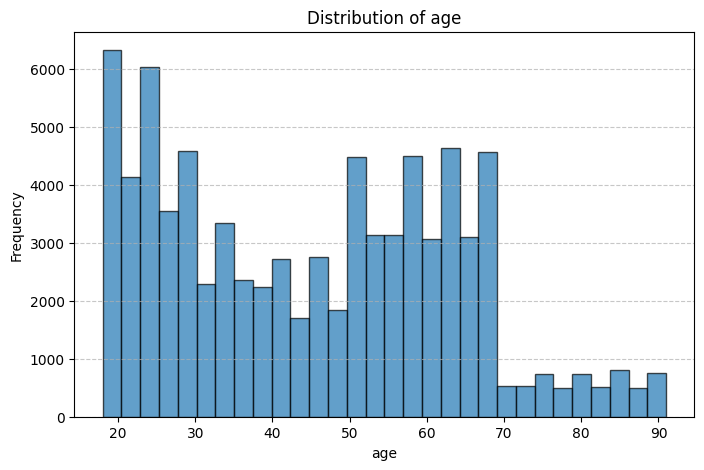

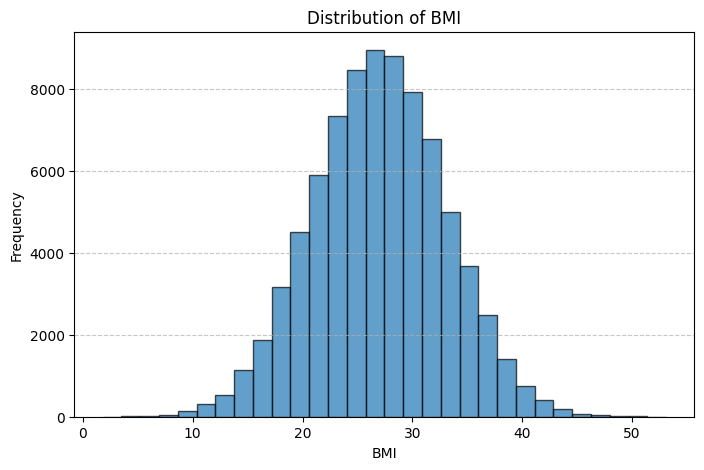

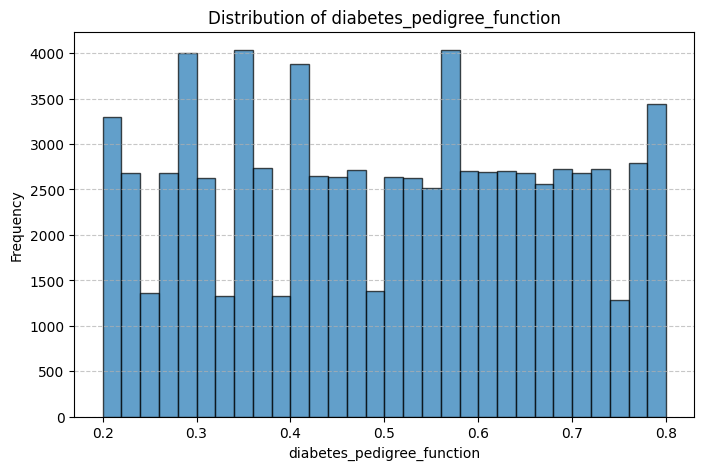

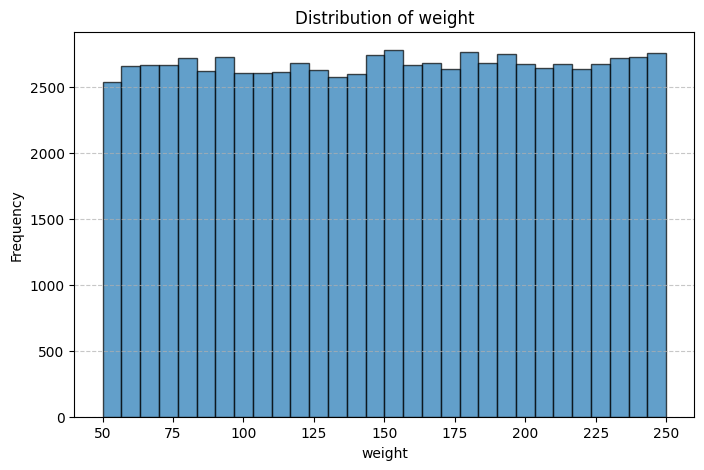

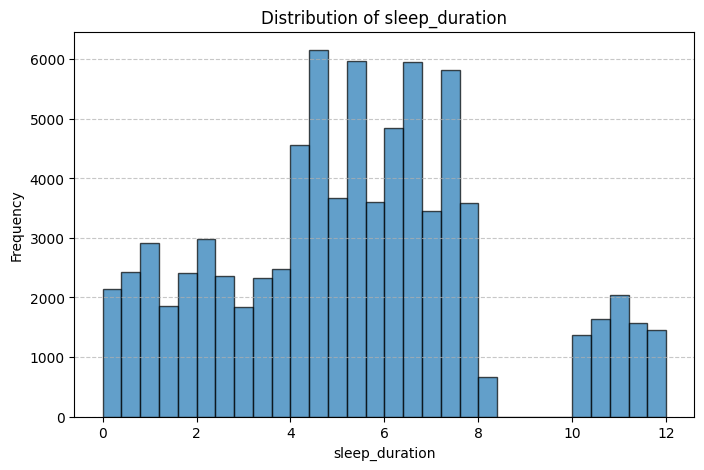

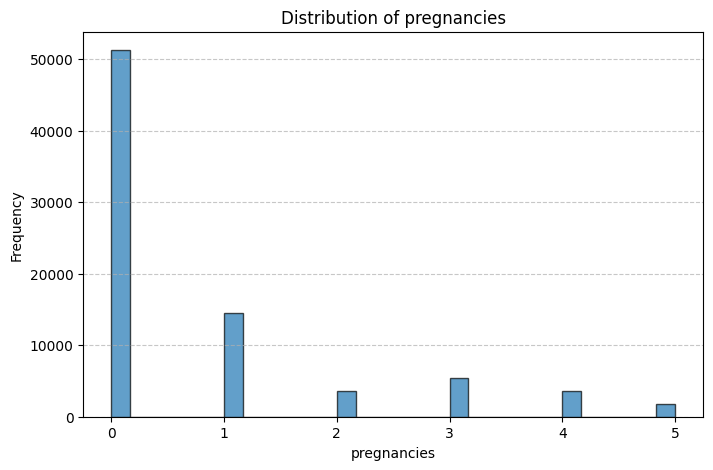

In [39]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Visualize the distributions of cleaned numerical data
#numerical_vars = ['age', 'BMI', 'diabetes_pedigree_function', 'weight', 'sleep_duration', 'pregnancies']
numerical_vars = numerical_columns

# Plot histograms for each numerical variable
for column in numerical_vars:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


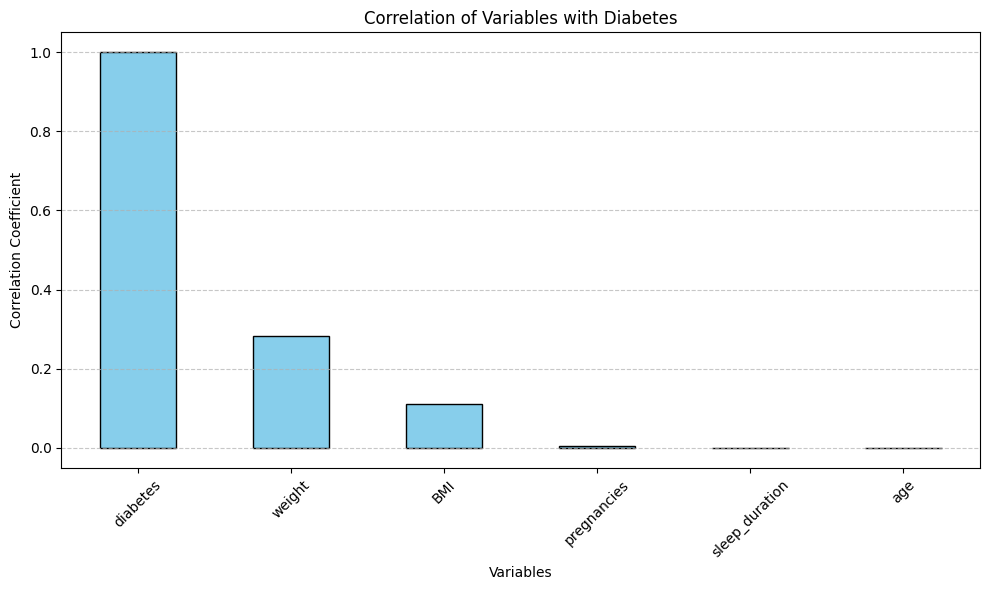

diabetes                      1.000000
weight                        0.281702
BMI                           0.111749
pregnancies                   0.003568
sleep_duration                0.000638
age                          -0.001413
diabetes_pedigree_function   -0.003960
Name: diabetes, dtype: float64

In [40]:
# Compute correlations between numerical variables and the target (diabetes)
correlation_matrix = data[numerical_vars + ['diabetes']].corr()

# Extract correlations with the target variable (diabetes)
diabetes_correlation = correlation_matrix['diabetes'].sort_values(ascending=False)

# Visualize the correlations using a bar plot
plt.figure(figsize=(10, 6))
diabetes_correlation[:-1].plot(kind='bar', color='skyblue', edgecolor='k')
plt.title("Correlation of Variables with Diabetes")
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

diabetes_correlation


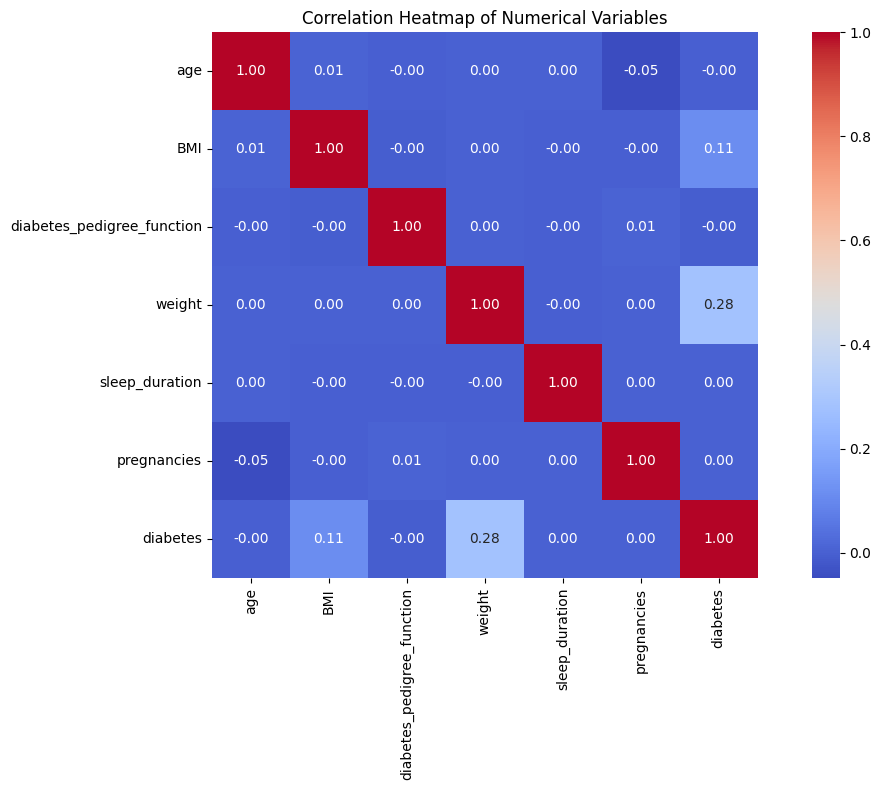

In [43]:
# Compute the correlation matrix for all numerical variables
correlation_matrix = data[numerical_vars + ['diabetes']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True, 
    cbar=True
)
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy="mean")
categorical_imputer = SimpleImputer(strategy="most_frequent")

# Apply imputers to respective columns
X[numerical_features] = numerical_imputer.fit_transform(X[numerical_features])
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# Retry train-test split after imputing missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Retry preprocessing and Logistic Regression pipeline
logreg_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg_pipeline.predict(X_test)
y_pred_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display results
results = {
    'Accuracy': accuracy,
    'ROC AUC': roc_auc,
    'Classification Report': classification_rep
}
results


NameError: name 'X' is not defined

In [44]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy="mean")
categorical_imputer = SimpleImputer(strategy="most_frequent")

# Apply imputers to respective columns
X[numerical_features] = numerical_imputer.fit_transform(X[numerical_features])
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# Retry train-test split after imputing missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Retry preprocessing and Logistic Regression pipeline
logreg_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg_pipeline.predict(X_test)
y_pred_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display results
results = {
    'Accuracy': accuracy,
    'ROC AUC': roc_auc,
    'Classification Report': classification_rep
}
results


NameError: name 'X' is not defined